In [3]:
import pandas as pd
import numpy as np
from google.colab import drive

from pandas import read_excel

# Load the dataset
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/My Drive/Interbankrates.xlsx')
#we display the first rows of data and confirm we have the right dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Rate
0,02/05/2025,9.9247
1,30/04/2025,9.9373
2,29/04/2025,9.9563
3,28/04/2025,9.9566
4,25/04/2025,9.9402


In [4]:
#we get some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    497 non-null    object 
 1   Rate    497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [7]:
# we get descriptive statistics about the data
df.describe()


,Rate
count,497.000000
mean,12.021000
std,1.544533
min,8.572200
25%,10.711900
50%,12.108700
75%,13.210900
max,17.382900


Data Cleaning

In [8]:
#we check for missing values
df.isnull().sum()

,0
Date,0
Rate,0


array([[<Axes: title={'center': 'Rate'}>]], dtype=object)

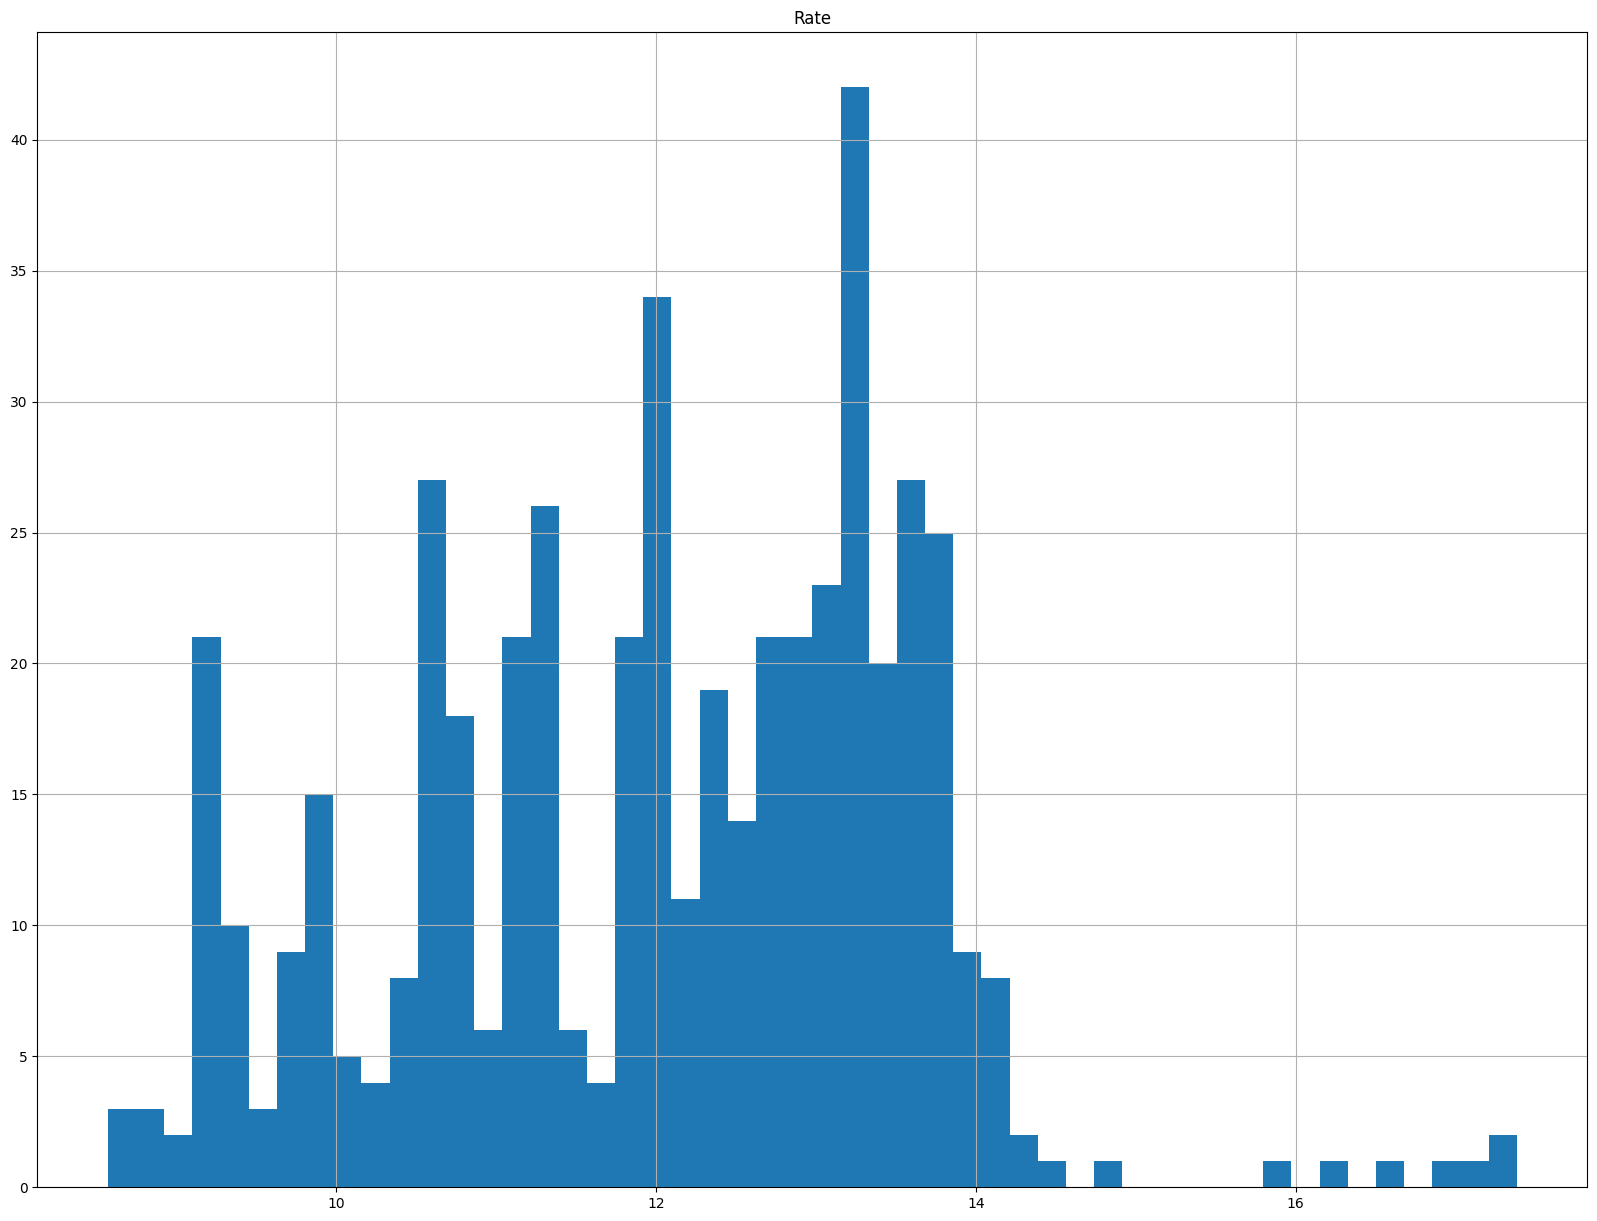

In [9]:
# we wont check for duplicates because daily interbank rates are close to each other
#plot a histogram
df.hist(bins=50, figsize=(20,15))



In [10]:
#identify outliers
#plot a heatmap
import seaborn as sns
corr_matrix = df.corr().abs()
sns.heatmap(corr_matrix, annot=True)

ValueError: could not convert string to float: '02/05/2025'

In [13]:
#drop the first column
data = df.drop(df.columns[0], axis=1)
data.head()

,Rate
0,9.9247
1,9.9373
2,9.9563
3,9.9566
4,9.9402


In [14]:
#pre process the time series for LSTM
#fit an LSTM model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)



In [23]:
#create time series sequence
time_step = 10
X, y = create_sequences(scaled_data, time_step)
#reshaping for LSTM
X=X.reshape(X.shape[0], X.shape[1], 1)

In [24]:
# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [31]:
#Build LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Build LSTM model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Regularization to prevent overfitting
model.add(LSTM(10, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(data)))

In [36]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))
# Evaluate the model
#train_loss = model.evaluate(X_train, y_train, verbose=0)
#test_loss = model.evaluate(X_test, y_test, verbose=0)
#print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-36-45951581f0f0>", line 9, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 77, in train_step

Incompatible shapes: [10] vs. [10,497]
	 [[{{node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs}}]] [Op:__inference_multi_step_on_iterator_29557]